In [34]:
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, DecisionTreeRegressor
#from graphviz import Source
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Training and Visualizing a Decision Tree

In [17]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

#Source.from_file("iris_tree.dot")

In [24]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

lengths, widths = np.meshgrid(
    np.linspace(0, 7.2, 100),
    np.linspace(0, 3, 100)
)

X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

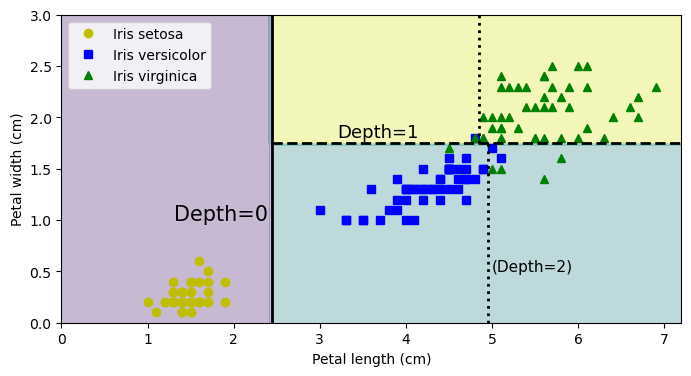

In [28]:
plt.figure(figsize=(8, 4))

plt.contourf(lengths, widths, y_pred, alpha=0.3)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label=f"Iris {name}")


tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)

plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()

In [39]:
tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

array([2.44999999, 1.75      , 4.95000005, 4.85000014])

In [30]:
tree_clf.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [102]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [104]:
tree_clf.predict([[5, 1.5]])

array([1])

In [169]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [171]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100),
        np.linspace(axes[2], axes[3], 100)
    )
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    #plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contourf(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx], color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

Text(0, 0.5, '')

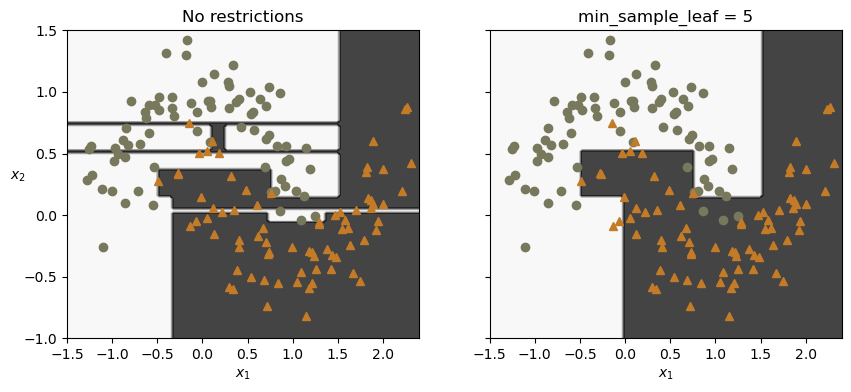

In [182]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")

plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_sample_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

In [185]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [187]:
tree_clf1.score(X_moons_test, y_moons_test)

0.901

In [189]:
tree_clf2.score(X_moons_test, y_moons_test)

0.918

### Regression

In [3]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [5]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

#Source.from_file("regression_tree.dot")

In [7]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [9]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [11]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])